# Importing Libraries

In [1]:
from skimage.segmentation import felzenszwalb
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np
import selectivesearch

# Region Proposals

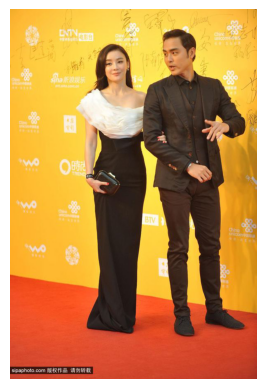

In [2]:
img = plt.imread('data/LV-MHP-v1/images/0001.jpg')
plt.imshow(img)
plt.axis('off');

Text(0.5, 0.98, 'Mask: Scale/Number of Segments')

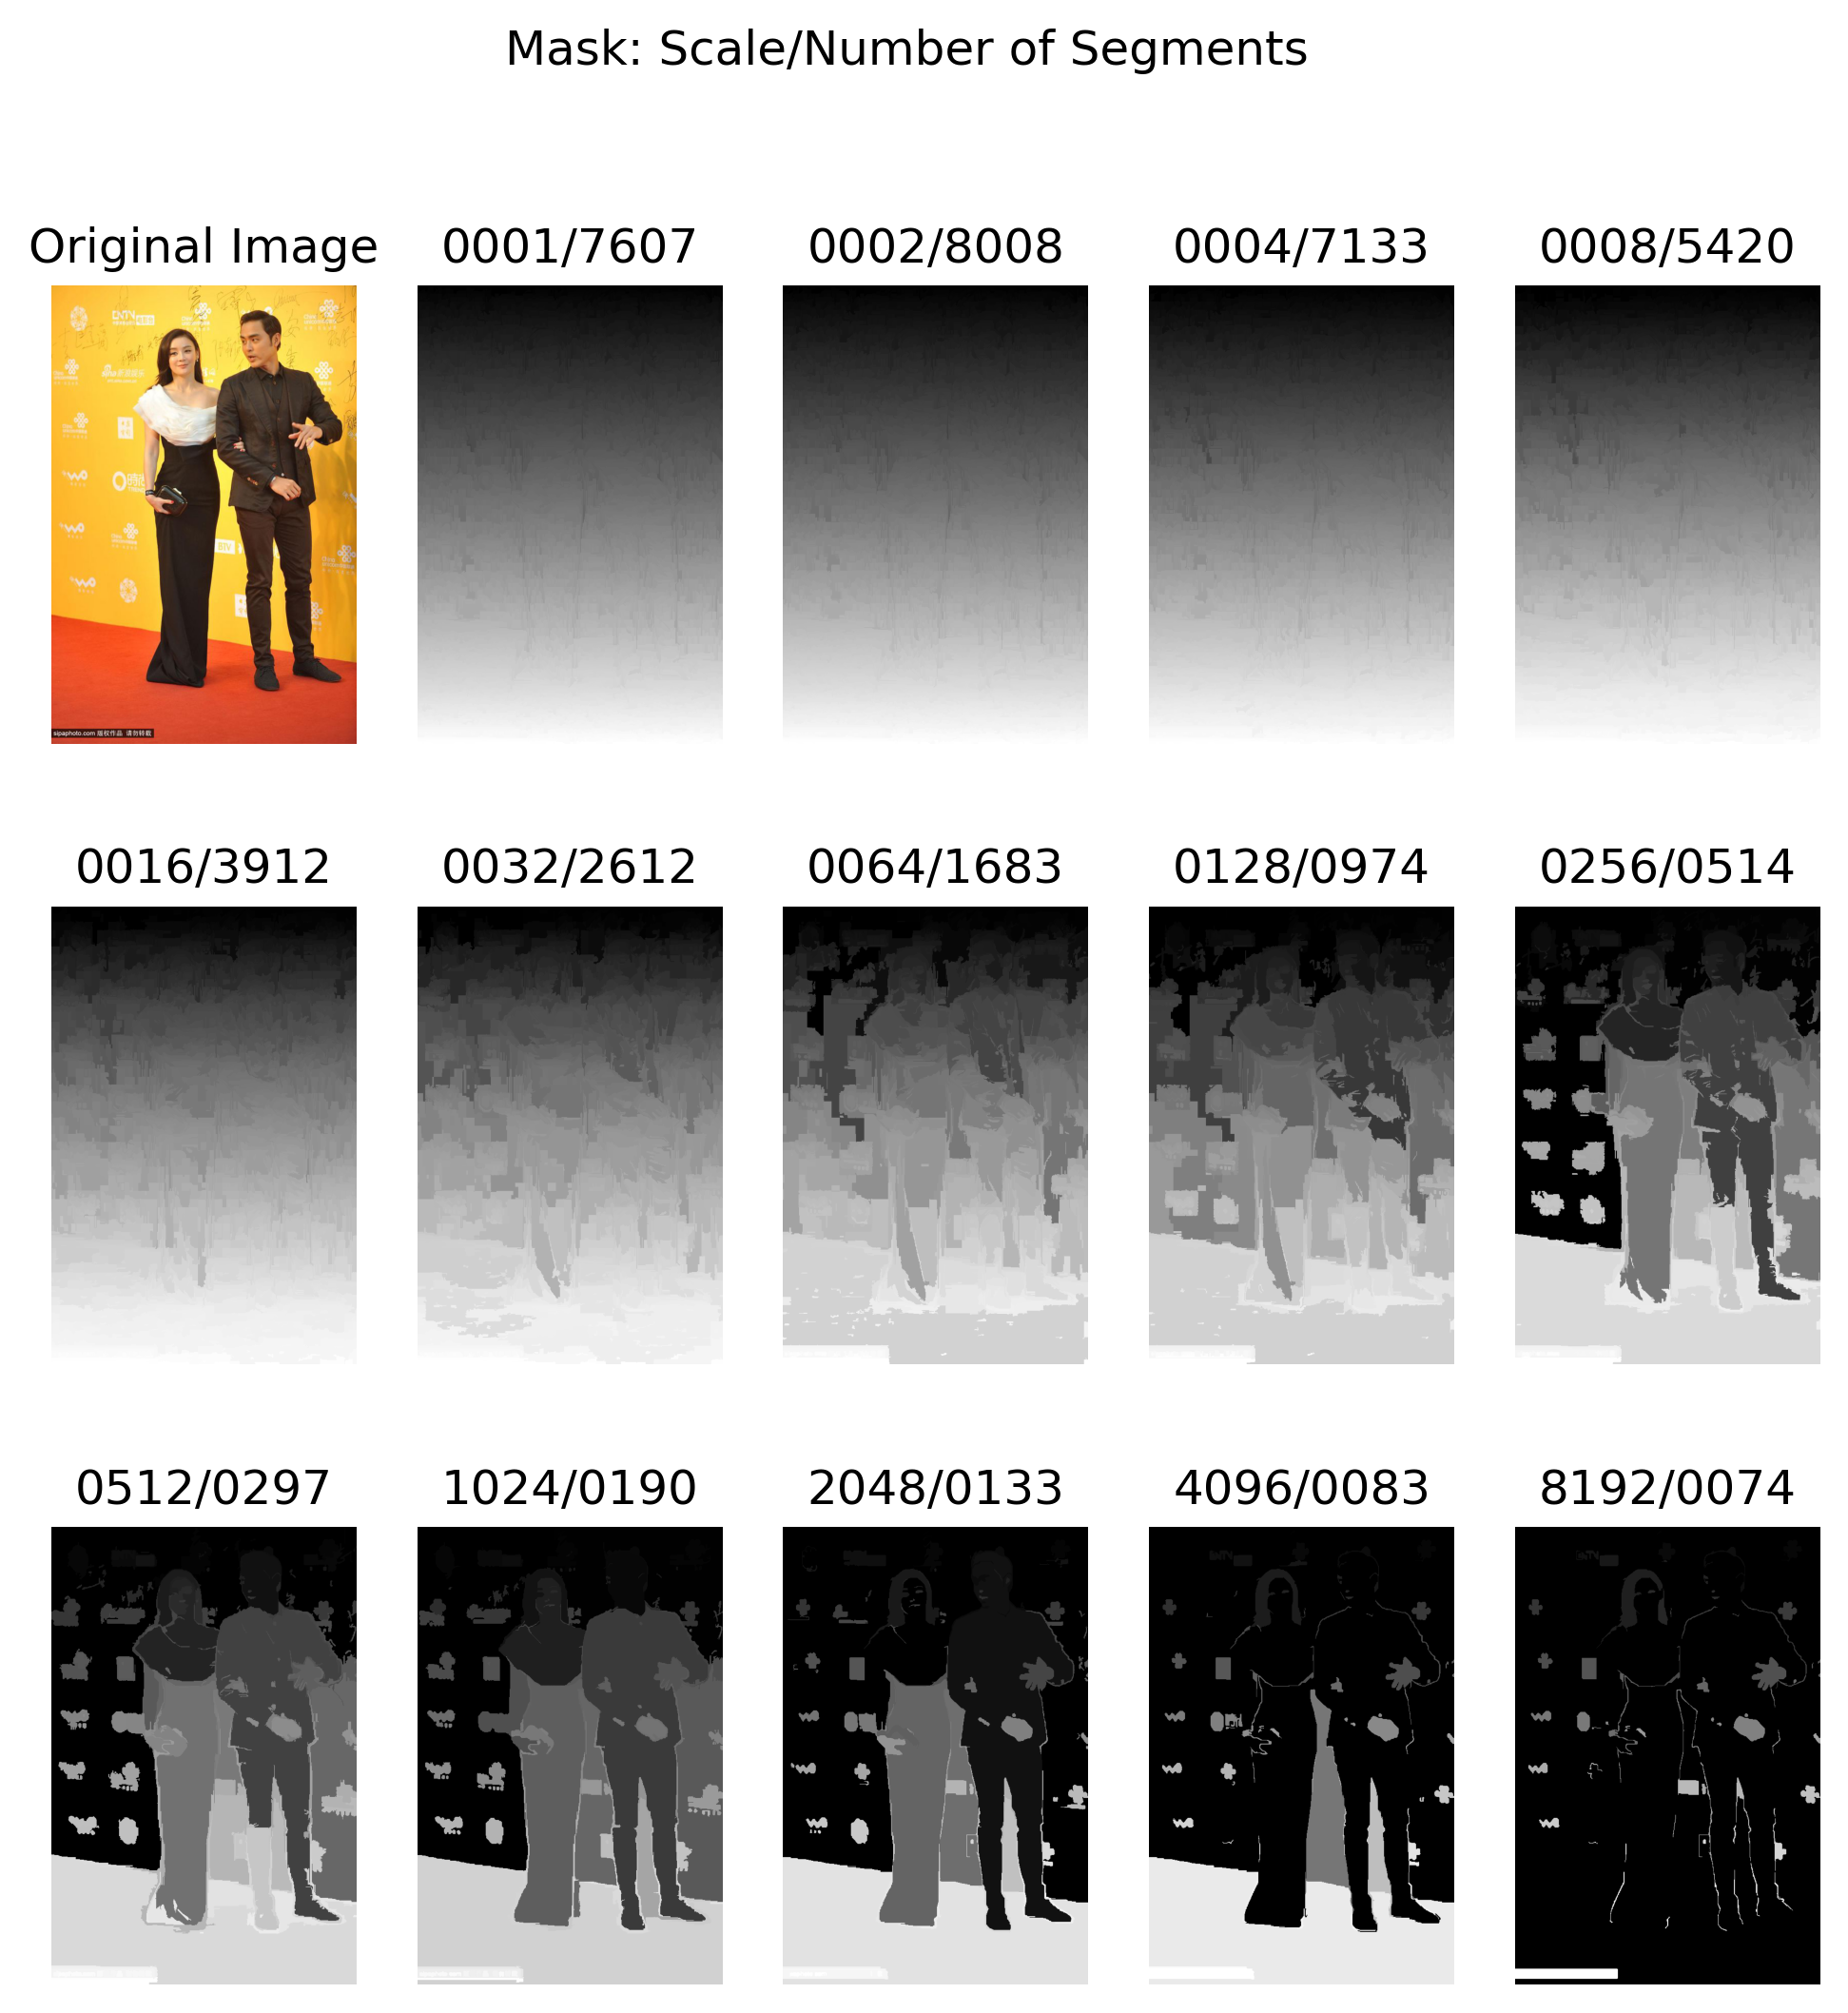

In [3]:
nrow, ncol = 3, 5
fig, axes = plt.subplots(nrows = nrow, ncols = ncol, figsize = (8,8), dpi = 300)
axes[0, 0].imshow(img)
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')
scale = 1
for i in range(nrow):
    for j in range(ncol):
        if i == 0 and j == 0:
            continue
        segments = felzenszwalb(img, scale = scale)
        no_of_segments = len(np.unique(segments))
        axes[i, j].imshow(segments, cmap = 'gray')
        axes[i, j].set_title(f'{scale:04}/{no_of_segments:04}')
        axes[i, j].axis('off')
        scale *= 2

fig.suptitle('Mask: Scale/Number of Segments')

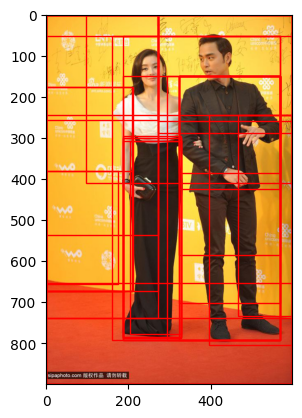

In [4]:
def extract_regions(img, scale):
    _, regions = selectivesearch.selective_search(img, scale = scale, min_size=100)
    candidates = []
    total_area = np.prod(img.shape[:2])
    for region in regions:
        if region['rect'] in candidates:
            continue
        # Remove rectangle which is less than 5% of total image area or greater than image
        elif region['size'] < (0.05*total_area):
            continue
        elif region['size'] > (1*total_area):
            continue
        candidates.append(region['rect'])
    return candidates


bboxes = extract_regions(img, scale = 100)
fig, axes = plt.subplots()
axes.imshow(img)
for bbox in bboxes:
    rect = Rectangle(bbox[:2], *bbox[2:], linewidth = 1, edgecolor = 'r', facecolor = 'none')
    axes.add_patch(rect)
plt.show();

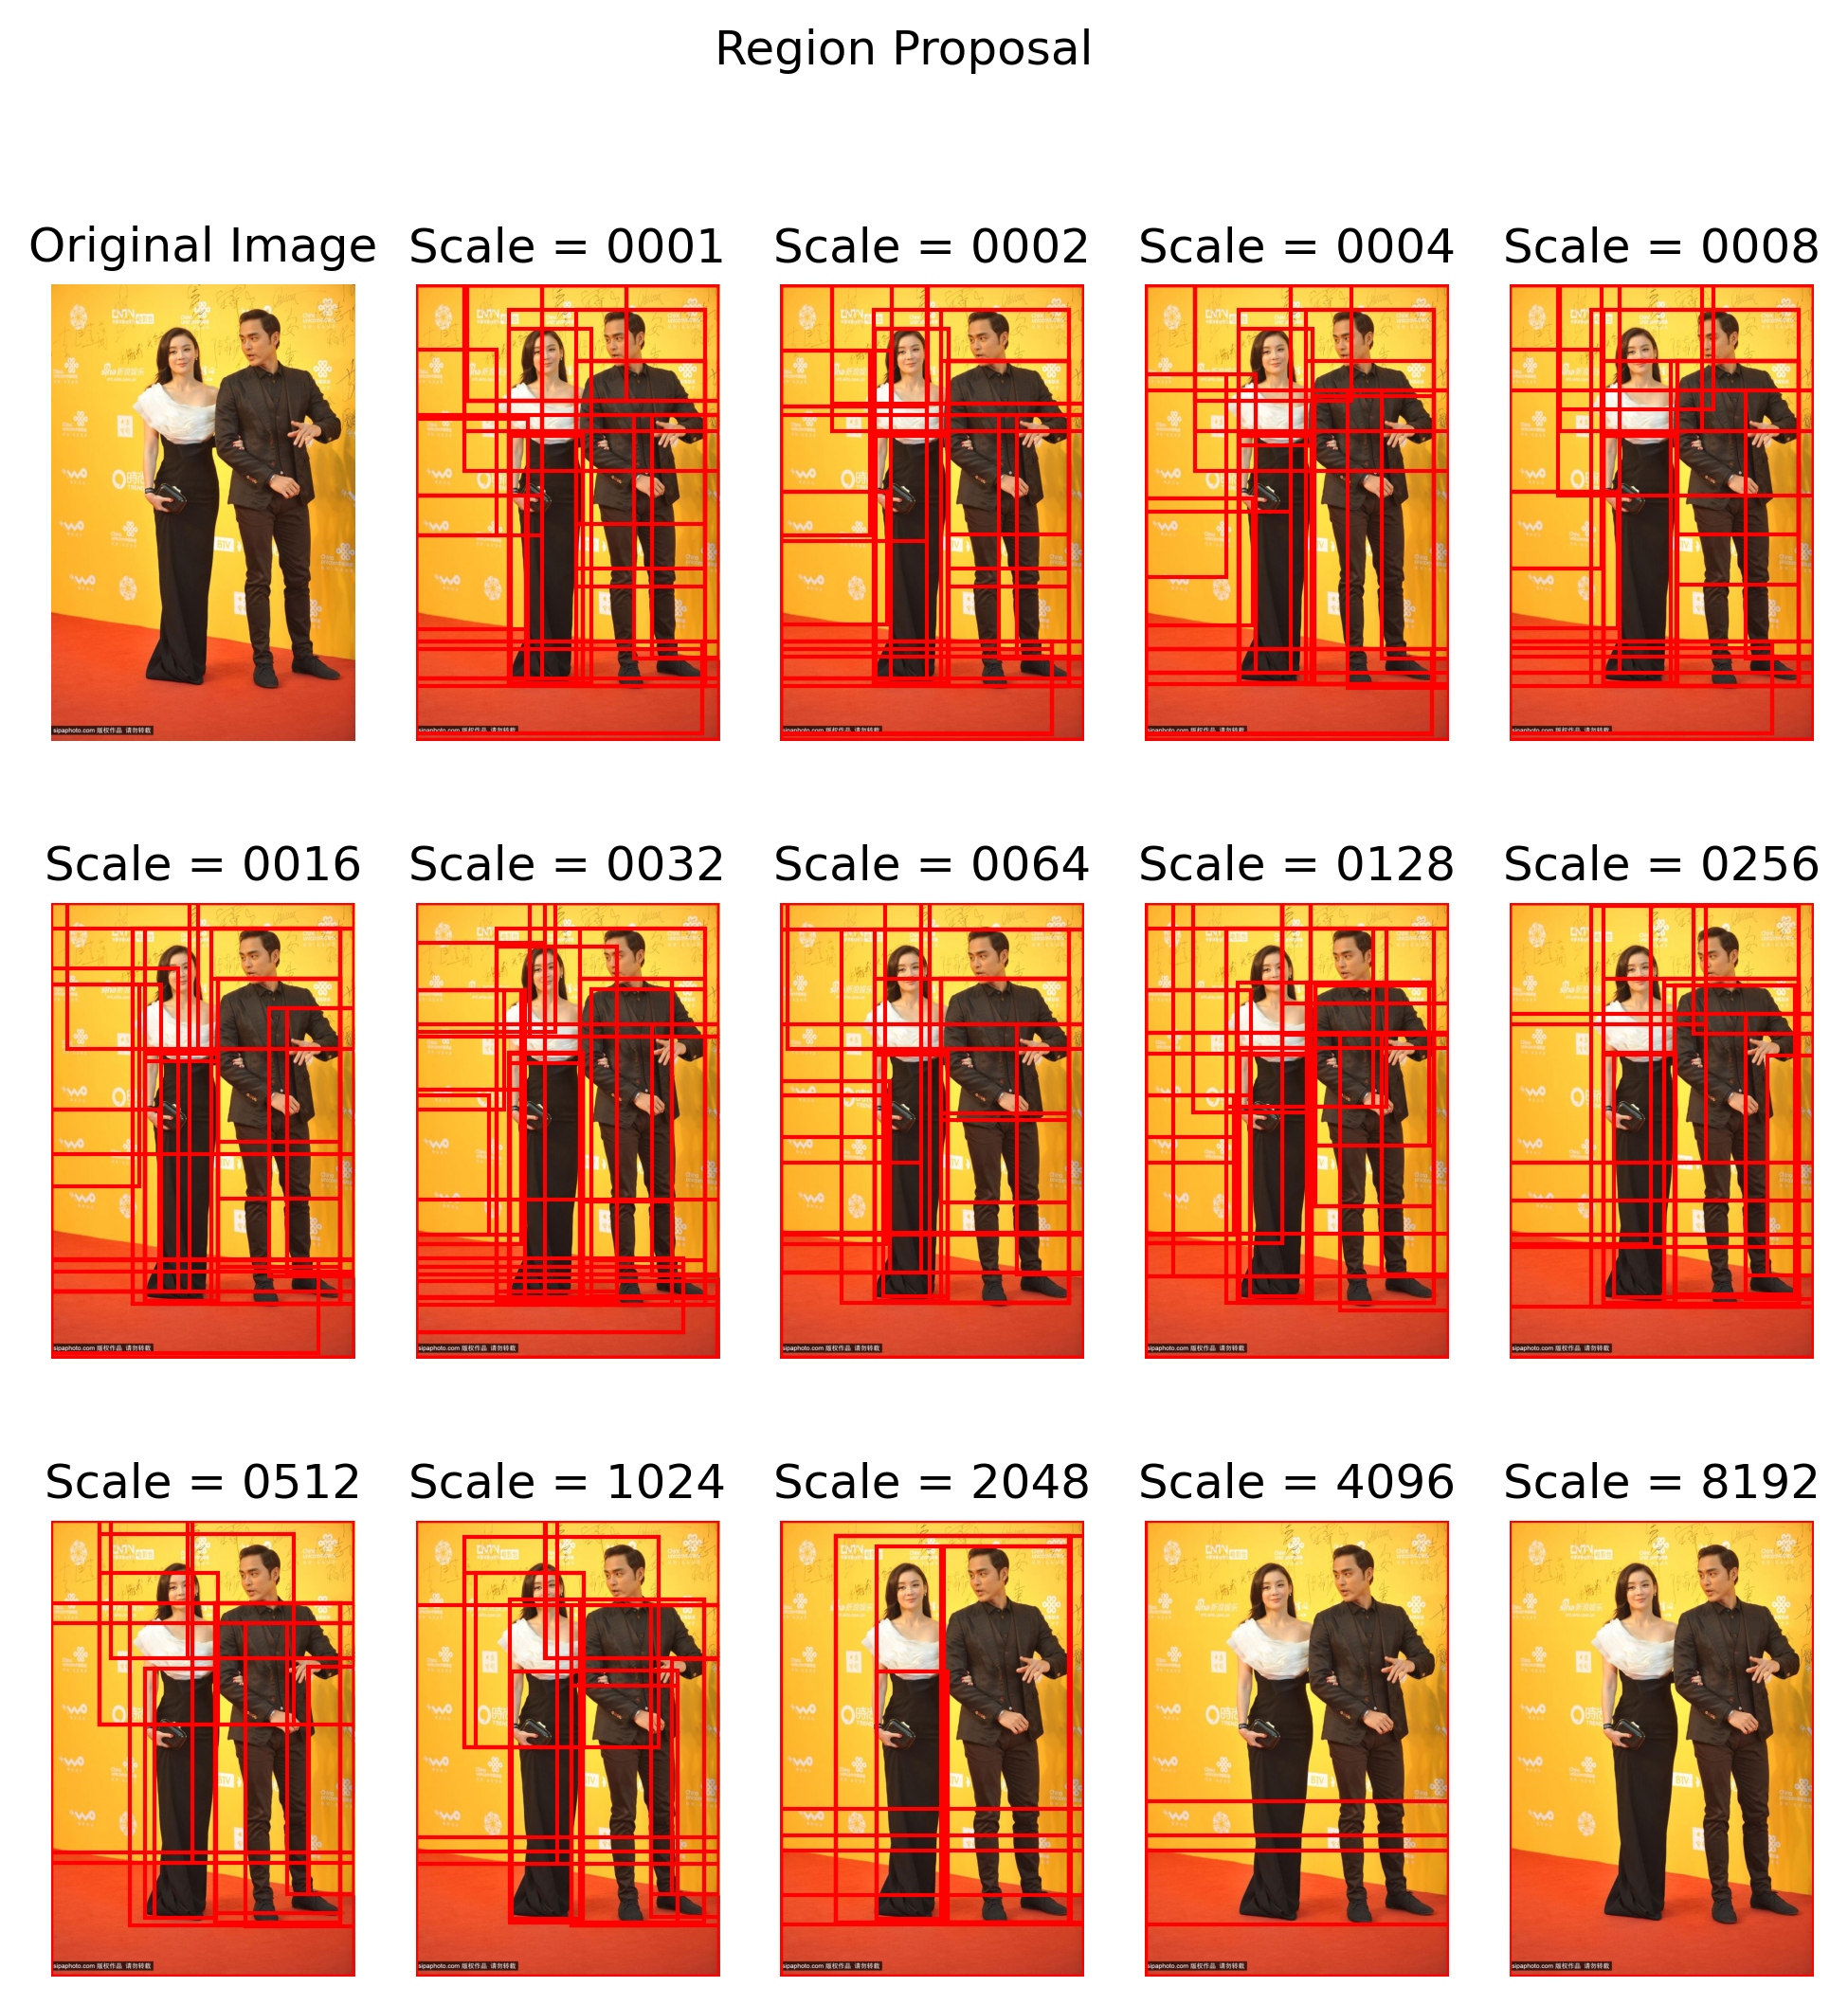

In [5]:
nrow, ncol = 3, 5
fig, axes = plt.subplots(nrows = nrow, ncols = ncol, figsize = (8,8), dpi = 300)
axes[0, 0].imshow(img)
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')
scale = 1
for i in range(nrow):
    for j in range(ncol):
        if i == 0 and j == 0:
            continue
        bboxes = extract_regions(img, scale = scale)
        axes[i, j].imshow(img)
        for bbox in bboxes:
            rect = Rectangle(bbox[:2], *bbox[2:], linewidth = 1, edgecolor = 'r', facecolor = 'none')
            axes[i, j].add_patch(rect)
        axes[i, j].set_title(f'Scale = {scale:04}')
        axes[i, j].axis('off')
        scale *= 2

fig.suptitle('Region Proposal');

__NOTE:__ Dataset used is from https://lv-mhp.github.io/dataset

__Citation:__ 
"Understanding Humans in Crowded Scenes: Deep Nested Adversarial Learning and A New Benchmark for Multi-Human Parsing"  
Jian Zhao*, Jianshu Li*, Yu Cheng*, Li Zhou, Terence Sim, Shuicheng Yan, Jiashi Feng;
arXiv:1804.03287 (* indicates equal contribution)

"Multi-Human Parsing in the Wild"  
Jianshu Li*, Jian Zhao*, Yunchao Wei, Congyan Lang, Yidong Li, Terence Sim, Shuicheng Yan, Jiashi Feng;
arXiv:1705.07206 (* indicates equal contribution)

"Generative Partition Networks for Multi-Person Pose Estimation”
Xuecheng Nie, Jiashi Feng, Junliang Xing, Shuicheng Yan;
arXiv:1705.07422